<a href="https://colab.research.google.com/github/CrystyGzz/challenge-Telecom-X-parte-2/blob/main/challenge_Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import requests
import pandas as pd
url_de_la_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
print("Paso 1: Buscar los datos (en formato JSON) desde la API...")

try:

    respuesta = requests.get(url_de_la_api)
    respuesta.raise_for_status()
    df_clientes = pd.read_json(url_de_la_api)

    print("¡Datos conseguidos y organizar en nuestra tabla de clientes!")
    print("\nAsí se ven las primeras 5 filas de nuestra tabla (DataFrame):")
    print(df_clientes.head())

    print("\nY esta es la información general de nuestra tabla (cuántas filas, columnas, y tipos de datos):")
    print(df_clientes.info())

except requests.exceptions.RequestException as e:
    print(f"¡Oops! Hubo un problema al intentar conseguir los datos. Error: {e}")
    print("Asegurar de que la URL de la API sea correcta y que tengas conexión a internet.")
except Exception as e:
    print(f"¡Oops! Algo más salió mal al procesar los datos. Error: {e}")
    print("Asegúr de que el archivo JSON en la URL sea válido.")

Paso 1: Buscar los datos (en formato JSON) desde la API...
¡Datos conseguidos y organizar en nuestra tabla de clientes!

Así se ven las primeras 5 filas de nuestra tabla (DataFrame):
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            int

In [2]:
print("Paso 2: Explorando dataset...")
print("\n--- Información general de nuestro DataFrame (df_clientes.info()): ---")
df_clientes.info()
print("\n--- Tipos de datos de cada columna (df_clientes.dtypes): ---")
print(df_clientes.dtypes)
print("\n--- Recordatorio del Diccionario de Datos: ---")
print("Enlace del diccionario de datos para entender cada columna:")
print("🔗 https://github.com/ingridcristh/challenge2-data-science-LATAM")
print("Este diccionario ayudará a saber qué significa 'gender', 'tenure', 'MonthlyCharges', etc.")
print("\n--- Reflexión sobre Columnas Relevantes: ---")
print("Basándo en el diccionario y los nombres de las columnas, piensa:")
print("- ¿Cuál es la columna que nos dice si un cliente se fue o no? (¡Esa es clave!)")
print("- ¿Qué otras columnas creo que podrían estar relacionadas con que un cliente decida irse?")
print("Por ejemplo, columnas como 'tenure' (cuánto tiempo llevan), 'MonthlyCharges' (cuánto pagan),")
print("o los tipos de servicios ('InternetService', 'OnlineSecurity', etc.) suelen ser muy importantes.")

Paso 2: Explorando dataset...

--- Información general de nuestro DataFrame (df_clientes.info()): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

--- Tipos de datos de cada columna (df_clientes.dtypes): ---
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

--- Recordatorio del Diccionario de Datos: ---
Enlace del diccionario de datos para entender cada columna:
🔗 https://github.com/ingridcristh/challenge2-data-science-LATAM
Este diccionario ayudará a saber qué significa 'gender',

In [4]:
print("Paso 3: Limpiando (ajustado para aplanar diccionarios en columnas)...")
print("\n--- Buscando pistas repetidas (clientes duplicados) por 'customerID': ---")
num_duplicados_id = df_clientes['customerID'].duplicated().sum()

if num_duplicados_id > 0:
    print(f"¡Se encontraron {num_duplicados_id} clientes duplicados basándose en 'customerID'!")
    print("Eliminando registros duplicados por 'customerID'...")
    df_clientes.drop_duplicates(subset=['customerID'], inplace=True)
    print(f"Duplicados eliminados. Ahora el número de filas es: {df_clientes.shape[0]}")
else:
    print("¡No se encontraron clientes duplicados por 'customerID'!")

print("\n--- Buscando pistas perdidas (valores ausentes): ---")
print(df_clientes.isnull().sum())

print("\n--- Identificando y aplanando columnas que contienen diccionarios: ---")

columnas_a_aplanar = []
for col in df_clientes.columns:
    if len(df_clientes[col]) > 0 and pd.notna(df_clientes[col].iloc[0]) and isinstance(df_clientes[col].iloc[0], dict):
        columnas_a_aplanar.append(col)

if columnas_a_aplanar:
    print(f"Columnas identificadas con diccionarios que necesitan ser aplanadas: {columnas_a_aplanar}")
    for col_dict in columnas_a_aplanar:
        print(f"Aplanando la columna '{col_dict}'...")
        df_temp = pd.json_normalize(df_clientes[col_dict])
        df_temp.columns = [f"{col_dict}_{sub_col}" for sub_col in df_temp.columns]
        df_clientes = pd.concat([df_clientes, df_temp], axis=1)
        df_clientes.drop(columns=[col_dict], inplace=True)
    print("¡Columnas aplanadas con éxito!")
else:
    print("No se encontraron columnas de diccionario para aplanar.")

print("\n--- Nombres de todas las columnas DESPUÉS del aplanamiento: ---")
print(df_clientes.columns)
print("----------------------------------------------------------------")

print("\n--- Verificando la limpieza de tipos de datos y valores únicos (después de aplanar): ---")

for col in df_clientes.select_dtypes(include='object').columns:
    if col in df_clientes.columns and not df_clientes[col].empty:
        print(f"\nValores únicos en la columna '{col}':")
        # Aquí también debemos asegurarnos de que no haya diccionarios si el aplanamiento no fue completo
        # o si hay otros diccionarios anidados más profundos.
        # Por seguridad, podemos filtrar para solo mostrar valores únicos si no son diccionarios/listas
        unique_values = df_clientes[col].apply(lambda x: x if not isinstance(x, (dict, list)) else None).unique()
        print([val for val in unique_values if val is not None])
    else:
        print(f"\nLa columna '{col}' no existe o está vacía, saltando la verificación de valores únicos.")

nombre_columna_cargos_totales = 'TotalCharges' # Reemplaza esto con el nombre real de la columna si es diferente

if nombre_columna_cargos_totales in df_clientes.columns:
    print(f"\n--- Intentando convertir '{nombre_columna_cargos_totales}' a un número: ---")
    df_clientes[nombre_columna_cargos_totales] = pd.to_numeric(df_clientes[nombre_columna_cargos_totales], errors='coerce')

    print(f"Valores ausentes en '{nombre_columna_cargos_totales}' después de la conversión:")
    print(df_clientes[nombre_columna_cargos_totales].isnull().sum())

    if df_clientes[nombre_columna_cargos_totales].isnull().sum() > 0:
        print(f"\nRellenando los valores ausentes en '{nombre_columna_cargos_totales}' con 0:")
        df_clientes[nombre_columna_cargos_totales].fillna(0, inplace=True)
        print(f"Verificación de valores ausentes en '{nombre_columna_cargos_totales}' después de rellenar:")
        print(df_clientes[nombre_columna_cargos_totales].isnull().sum())
else:
    print(f"\n¡La columna '{nombre_columna_cargos_totales}' NO se encontró en el DataFrame después del aplanamiento!")
    print("Por favor, revisa la salida de 'df_clientes.columns' para encontrar el nombre correcto de la columna de cargos totales.")

# Verificando nuevamente los tipos de datos para asegurarnos de que la columna de cargos sea numérica.
print("\n--- Nuevos tipos de datos después de la limpieza de cargos totales: ---")
print(df_clientes.dtypes)

Paso 3: Limpiando (ajustado para aplanar diccionarios en columnas)...

--- Buscando pistas repetidas (clientes duplicados) por 'customerID': ---
¡No se encontraron clientes duplicados por 'customerID'!

--- Buscando pistas perdidas (valores ausentes): ---
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

--- Identificando y aplanando columnas que contienen diccionarios: ---
No se en

In [5]:
import pandas as pd

print("Paso 4: Creando la columna 'Cuentas_Diarias'...")

# Identificamos la columna de facturación mensual.
# Basado en la salida del Paso 3, esta columna se llama 'account_Charges.Monthly'.
columna_facturacion_mensual = 'account_Charges.Monthly'

# Verificamos si la columna existe antes de intentar usarla.
if columna_facturacion_mensual in df_clientes.columns:
    # Definimos el número de días promedio en un mes
    dias_en_mes = 30

    # Calculamos las Cuentas_Diarias
    # Nos aseguramos de que la columna sea numérica antes de la división, aunque ya la verificamos.
    df_clientes['Cuentas_Diarias'] = pd.to_numeric(df_clientes[columna_facturacion_mensual], errors='coerce') / dias_en_mes

    # Verificamos si se introdujeron NaNs durante la conversión
    if df_clientes['Cuentas_Diarias'].isnull().sum() > 0:
        print(f"Advertencia: Se encontraron {df_clientes['Cuentas_Diarias'].isnull().sum()} valores nulos en 'Cuentas_Diarias' después del cálculo.")
        print("Rellenando los valores nulos en 'Cuentas_Diarias' con 0.")
        df_clientes['Cuentas_Diarias'].fillna(0, inplace=True)


    print(f"Columna 'Cuentas_Diarias' creada exitosamente usando '{columna_facturacion_mensual}'.")
    print("\nPrimeras 5 filas con la nueva columna:")
    print(df_clientes[['customerID', columna_facturacion_mensual, 'Cuentas_Diarias']].head())

    print("\nDescripción estadística de 'Cuentas_Diarias':")
    print(df_clientes['Cuentas_Diarias'].describe())
else:
    print(f"Error: La columna '{columna_facturacion_mensual}' no se encontró en el DataFrame.")
    print("Por favor, verifica el nombre de la columna de facturación mensual.")

Paso 4: Creando la columna 'Cuentas_Diarias'...
Columna 'Cuentas_Diarias' creada exitosamente usando 'account_Charges.Monthly'.

Primeras 5 filas con la nueva columna:
   customerID  account_Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667

Descripción estadística de 'Cuentas_Diarias':
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [6]:
import pandas as pd

print("Paso 5: Estandarización y Transformación de Datos...")

## 1. Convertir valores binarios (Sí/No, Yes/No, Male/Female) a 1 y 0

print("\n--- Convirtiendo valores binarios a numéricos (1 y 0): ---")

# Diccionario de mapeo para valores 'Yes'/'No' y 'Male'/'Female'
# Incluimos 'No internet service' y 'No phone service' ya que también son binarios en contexto
mapeos_binarios = {
    'Yes': 1,
    'No': 0,
    'Male': 1,  # Podemos asignar 1 a Male y 0 a Female, o viceversa, lo importante es la consistencia.
    'Female': 0,
    'No phone service': 0, # Consideramos esto como 'No' en el contexto de tener el servicio
    'No internet service': 0 # Consideramos esto como 'No' en el contexto de tener el servicio
}

# Revisar esta lista contra los `df_clientes.columns` que imprimimos antes
columnas_binarias = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Un caso especial para el género
if 'customer_gender' in df_clientes.columns:
    print(f"Procesando 'customer_gender': {df_clientes['customer_gender'].unique()}")
    df_clientes['customer_gender'] = df_clientes['customer_gender'].replace({'Male': 1, 'Female': 0})
    if df_clientes['customer_gender'].isnull().any():
        print("Advertencia: Se encontraron valores nulos en 'customer_gender' después de la conversión. Esto no debería ocurrir.")
    print(f"Valores únicos de 'customer_gender' después de la conversión: {df_clientes['customer_gender'].unique()}")
else:
    print("La columna 'customer_gender' no se encontró. Saltando su conversión.")


# Aplicar el mapeo a las demás columnas binarias
for col in columnas_binarias:
    if col in df_clientes.columns:
        # Imprimimos los valores únicos antes de la transformación para ver cómo se ven
        print(f"Procesando '{col}': {df_clientes[col].unique()}")
        df_clientes[col] = df_clientes[col].replace(mapeos_binarios)
        # Verificamos si hay NaNs después de la conversión (si hubiera valores no mapeados)
        if df_clientes[col].isnull().any():
            print(f"Advertencia: Se encontraron valores nulos en '{col}' después de la conversión. Revisa si hay valores inesperados.")
        print(f"Valores únicos de '{col}' después de la conversión: {df_clientes[col].unique()}")
    else:
        print(f"La columna '{col}' no se encontró. Saltando su conversión.")


## 2. Renombrar columnas para mayor claridad

print("\n--- Renombrando columnas para mayor claridad: ---")
nuevos_nombres_columnas = {
    'customerID': 'ID_Cliente',
    'customer_gender': 'Genero_Cliente',
    'customer_SeniorCitizen': 'Cliente_TerceraEdad',
    'customer_Partner': 'Cliente_Pareja',
    'customer_Dependents': 'Cliente_Dependientes',
    'customer_tenure': 'Antiguedad_Meses',
    'phone_PhoneService': 'Servicio_Telefono',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Facturacion_Electronica',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges.Monthly': 'Cargos_Mensuales',
    'account_Charges.Total': 'Cargos_Totales',
}

# Aplicar el renombramiento
# Usamos .copy() para evitar un SettingWithCopyWarning en futuros usos del DataFrame
df_clientes = df_clientes.rename(columns=nuevos_nombres_columnas).copy()

print("Columnas renombradas. Nuevos nombres de columnas:")
print(df_clientes.columns.tolist())

## 3. Verificar los tipos de datos finales
print("\n--- Tipos de datos después de la estandarización y transformación: ---")
print(df_clientes.dtypes)

## 4. Mostrar algunas filas del DataFrame transformado
print("\n--- Primeras 5 filas del DataFrame después de la transformación: ---")
print(df_clientes.head())

Paso 5: Estandarización y Transformación de Datos...

--- Convirtiendo valores binarios a numéricos (1 y 0): ---
Procesando 'customer_gender': ['Female' 'Male']
Valores únicos de 'customer_gender' después de la conversión: [0 1]
Procesando 'Churn': ['No' 'Yes' '']
Valores únicos de 'Churn' después de la conversión: [0 1 '']
Procesando 'customer_Partner': ['Yes' 'No']
Valores únicos de 'customer_Partner' después de la conversión: [1 0]
Procesando 'customer_Dependents': ['Yes' 'No']
Valores únicos de 'customer_Dependents' después de la conversión: [1 0]
Procesando 'phone_PhoneService': ['Yes' 'No']
Valores únicos de 'phone_PhoneService' después de la conversión: [1 0]
Procesando 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
Valores únicos de 'phone_MultipleLines' después de la conversión: [0 1]
Procesando 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos de 'internet_OnlineSecurity' después de la conversión: [0 1]
Procesando 'internet_OnlineBackup': ['

/tmp/ipython-input-2165800759.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes['customer_gender'] = df_clientes['customer_gender'].replace({'Male': 1, 'Female': 0})
/tmp/ipython-input-2165800759.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes[col] = df_clientes[col].replace(mapeos_binarios)


In [7]:
import pandas as pd

print("Paso 6: Realizando el Análisis Descriptivo de los Datos...")

# 1. Análisis Descriptivo para Columnas Numéricas
# ===================================================
print("\n--- Estadísticas Descriptivas para Columnas Numéricas: ---")
# .describe() funciona automáticamente en columnas numéricas.
# Puedes añadir .T (transpose) para que la salida sea más fácil de leer si tienes muchas columnas.
print(df_clientes.describe().T)

# 2. Análisis Descriptivo para Columnas Categóricas
# ===================================================
print("\n--- Recuento de Valores y Valores Únicos para Columnas Categóricas: ---")

# Identificamos las columnas categóricas que aún son 'object'
columnas_categoricas_object = df_clientes.select_dtypes(include='object').columns

print("\nColumnas categóricas (tipo 'object'):")
for col in columnas_categoricas_object:
    print(f"\n--- Columna: '{col}' ---")
    print(df_clientes[col].value_counts()) # Muestra el recuento de cada categoría
    print(f"Valores únicos: {df_clientes[col].unique()}") # Muestra todos los valores únicos

columnas_binarias_transformadas = [
    'Cliente_TerceraEdad',
    'Cliente_Pareja',
    'Cliente_Dependientes',
    'Servicio_Telefono',
    'Multiples_Lineas',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'Streaming_TV',
    'Streaming_Peliculas',
    'Facturacion_Electronica',
    'Churn',
    'Genero_Cliente' # Si se incluyó en la transformación a 0/1
]

print("\n--- Distribución de Columnas Binarias (0 y 1) después de la Transformación: ---")
for col in columnas_binarias_transformadas:
    if col in df_clientes.columns:
        print(f"\n--- Columna: '{col}' ---")
        print(df_clientes[col].value_counts(normalize=True) * 100) # Muestra el porcentaje
        print(f"Tipo de dato: {df_clientes[col].dtype}")
    else:
        print(f"Columna '{col}' no encontrada. Revisa si el nombre es correcto o si fue renombrada.")


print("\nAnálisis Descriptivo Completado.")

Paso 6: Realizando el Análisis Descriptivo de los Datos...

--- Estadísticas Descriptivas para Columnas Numéricas: ---
                          count       mean        std        min        25%  \
Genero_Cliente           7267.0   0.505711   0.500002   0.000000   0.000000   
Cliente_TerceraEdad      7267.0   0.162653   0.369074   0.000000   0.000000   
Cliente_Pareja           7267.0   0.484106   0.499782   0.000000   0.000000   
Cliente_Dependientes     7267.0   0.300124   0.458343   0.000000   0.000000   
Antiguedad_Meses         7267.0  32.346498  24.571773   0.000000   9.000000   
Servicio_Telefono        7267.0   0.902711   0.296371   0.000000   1.000000   
Multiples_Lineas         7267.0   0.421770   0.493876   0.000000   0.000000   
Seguridad_Online         7267.0   0.285950   0.451897   0.000000   0.000000   
Respaldo_Online          7267.0   0.344571   0.475261   0.000000   0.000000   
Proteccion_Dispositivo   7267.0   0.342782   0.474672   0.000000   0.000000   
Soporte_Tecn

Verificando y preparando columnas numéricas para la matriz de correlación...
Rellenando 11 NaN(s) en 'Cargos_Totales' con 0.0
Rellenando 224 NaN(s) en 'Churn' con 0.0

Columnas que se usarán para la matriz de correlación y sus tipos de datos:
- Antiguedad_Meses: int64
- Cargos_Mensuales: float64
- Cargos_Totales: float64
- Cuentas_Diarias: float64
- Cliente_TerceraEdad: int64
- Cliente_Pareja: int64
- Cliente_Dependientes: int64
- Servicio_Telefono: int64
- Multiples_Lineas: int64
- Seguridad_Online: int64
- Respaldo_Online: int64
- Proteccion_Dispositivo: int64
- Soporte_Tecnico: int64
- Streaming_TV: int64
- Streaming_Peliculas: int64
- Facturacion_Electronica: int64
- Genero_Cliente: int64
- Churn: float64

--- Visualizando la Matriz de Correlación de Variables Numéricas ---


/tmp/ipython-input-1369906616.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clientes[col].fillna(0.0, inplace=True)


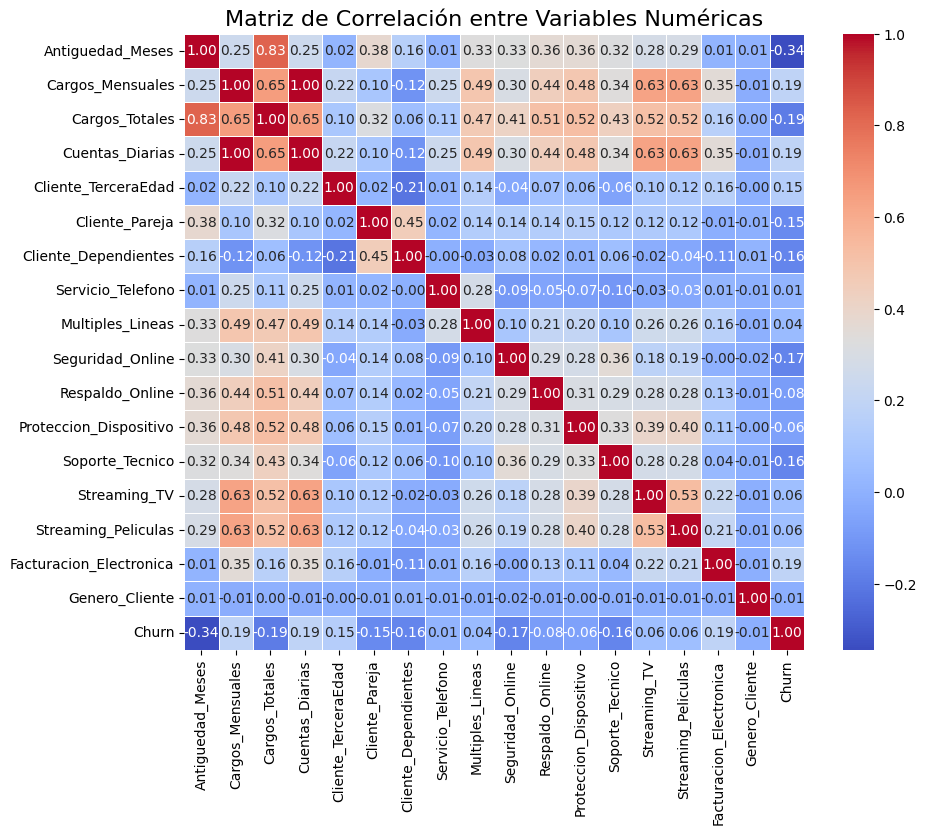


Visualización de Datos Completada. ¡Explora los gráficos!


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Verificando y preparando columnas numéricas para la matriz de correlación...")

# Lista de columnas que DEBERÍAN ser numéricas y que quieres en la matriz de correlación.
# Incluye 'Churn' ya que es tu variable objetivo y ahora es numérica (0/1).
columnas_numericas_finales = [
    'Antiguedad_Meses',
    'Cargos_Mensuales',
    'Cargos_Totales',
    'Cuentas_Diarias',
    'Cliente_TerceraEdad',
    'Cliente_Pareja',
    'Cliente_Dependientes',
    'Servicio_Telefono',
    'Multiples_Lineas',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'Streaming_TV',
    'Streaming_Peliculas',
    'Facturacion_Electronica',
    'Genero_Cliente', # Si 'Male'/'Female' se mapeó a 0/1
    'Churn' # La variable objetivo
]

columnas_existentes_para_corr = [col for col in columnas_numericas_finales if col in df_clientes.columns]

# Iterar sobre estas columnas y forzar la conversión a numérico.
# Esto es una medida de seguridad extra
for col in columnas_existentes_para_corr:
    # Convertir a numérico, transformando errores a NaN
    df_clientes[col] = pd.to_numeric(df_clientes[col], errors='coerce')
    # Rellenar NaN con 0.0 (o el valor que consideres apropiado, 0.0 es común para cargos)
    if df_clientes[col].isnull().any():
        print(f"Rellenando {df_clientes[col].isnull().sum()} NaN(s) en '{col}' con 0.0")
        df_clientes[col].fillna(0.0, inplace=True)

    #asegurar no haya strings vacías o con solo espacios.
    if df_clientes[col].dtype == 'object':
        problematic_values = df_clientes[col][df_clientes[col].isin(['', ' '])].index
        if not problematic_values.empty:
            print(f"Advertencia: Se encontraron cadenas vacías/espacios en '{col}' ({len(problematic_values)} ocurrencias). Rellenando con 0.0.")
            df_clientes.loc[problematic_values, col] = 0.0
            # Intentar convertir de nuevo después de rellenar
            df_clientes[col] = pd.to_numeric(df_clientes[col], errors='coerce').fillna(0.0)


print("\nColumnas que se usarán para la matriz de correlación y sus tipos de datos:")
for col in columnas_existentes_para_corr:
    print(f"- {col}: {df_clientes[col].dtype}")



##  Matriz de Correlación para Variables Numéricas
print("\n--- Visualizando la Matriz de Correlación de Variables Numéricas ---")

corr_matrix = df_clientes[columnas_existentes_para_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

print("\nVisualización de Datos Completada. ¡Explora los gráficos!")

Paso 7: Analizando la distribución de la variable 'Churn'...

--- Recuento de Clientes por Estado de Churn: ---
Churn
0.0    5398
1.0    1869
Name: count, dtype: int64

--- Porcentaje de Clientes por Estado de Churn: ---
Churn
0.0    74.28
1.0    25.72
Name: proportion, dtype: float64

--- Gráfico de Pastel de la Distribución de Churn ---


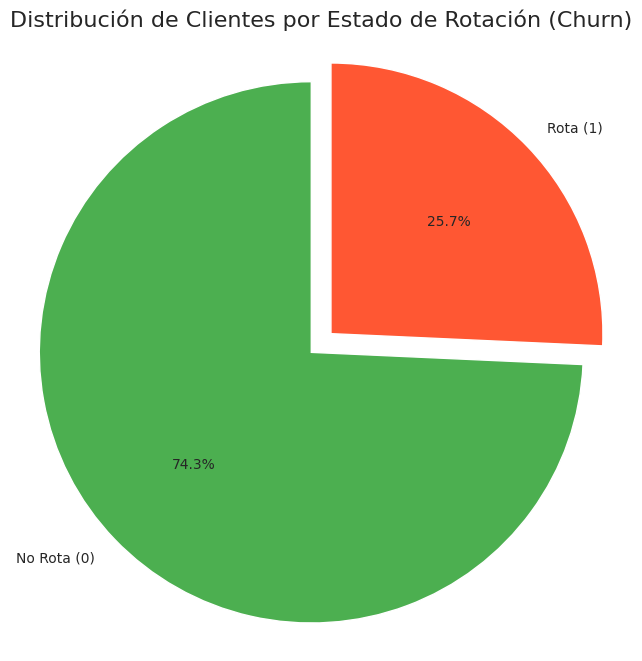


--- Gráfico de Barras de la Distribución de Churn ---


/tmp/ipython-input-3725491517.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_clientes, palette=colors)


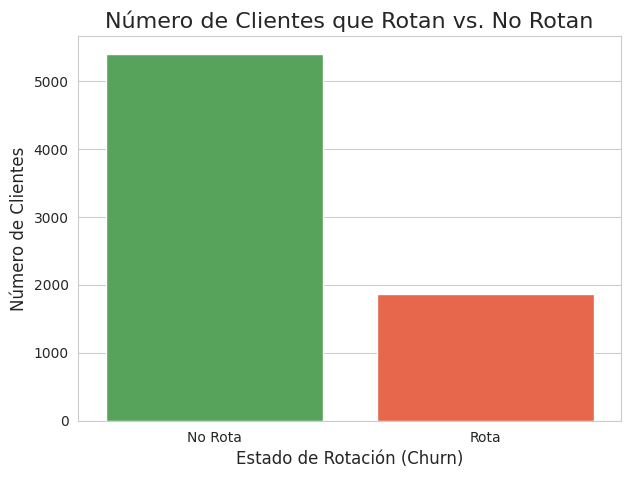


Análisis de la distribución de 'Churn' completado para el Paso 7.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Paso 7: Analizando la distribución de la variable 'Churn'...")

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# 1. Calcular el recuento y el porcentaje de cada categoría de 'Churn'
churn_counts = df_clientes['Churn'].value_counts()
churn_percentages = df_clientes['Churn'].value_counts(normalize=True) * 100

print("\n--- Recuento de Clientes por Estado de Churn: ---")
print(churn_counts)
print("\n--- Porcentaje de Clientes por Estado de Churn: ---")
print(churn_percentages.round(2))
labels = ['No Rota (0)', 'Rota (1)']
colors = ['#4CAF50', '#FF5733']


# 2. Visualización con Gráfico de Pastel (Pie Chart)
print("\n--- Gráfico de Pastel de la Distribución de Churn ---")
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribución de Clientes por Estado de Rotación (Churn)', fontsize=16)
plt.axis('equal')
plt.show()


# 3. Visualización con Gráfico de Barras
print("\n--- Gráfico de Barras de la Distribución de Churn ---")
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df_clientes, palette=colors)
plt.title('Número de Clientes que Rotan vs. No Rotan', fontsize=16)
plt.xlabel('Estado de Rotación (Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Rota', 'Rota'], fontsize=10)
plt.show()

print("\nAnálisis de la distribución de 'Churn' completado para el Paso 7.")

Paso 8: Explorando la distribución de Churn por variables categóricas...

--- Analizando 'Genero_Cliente' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn             0.0    1.0
Genero_Cliente              
0               73.86  26.14
1               74.69  25.31


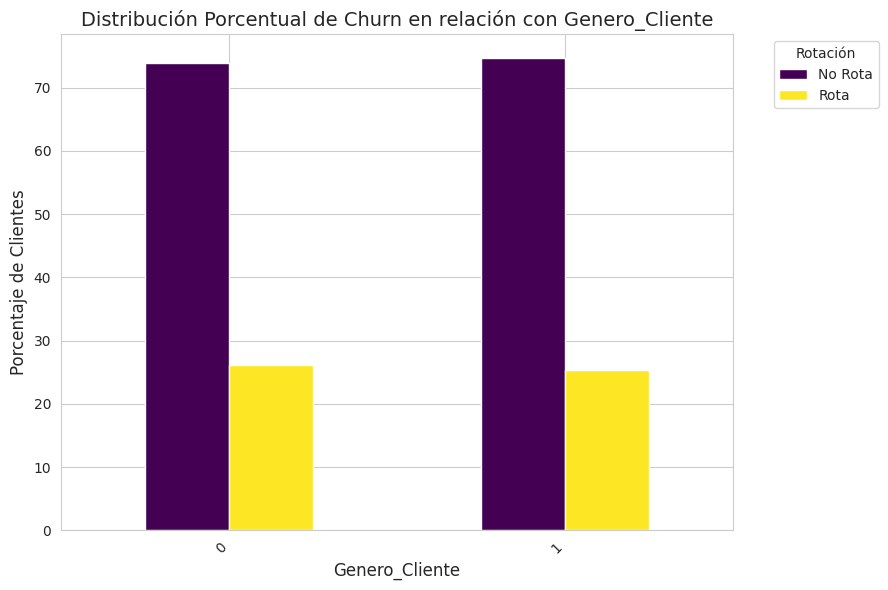


--- Analizando 'Cliente_TerceraEdad' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                  0.0    1.0
Cliente_TerceraEdad              
0                    77.11  22.89
1                    59.73  40.27


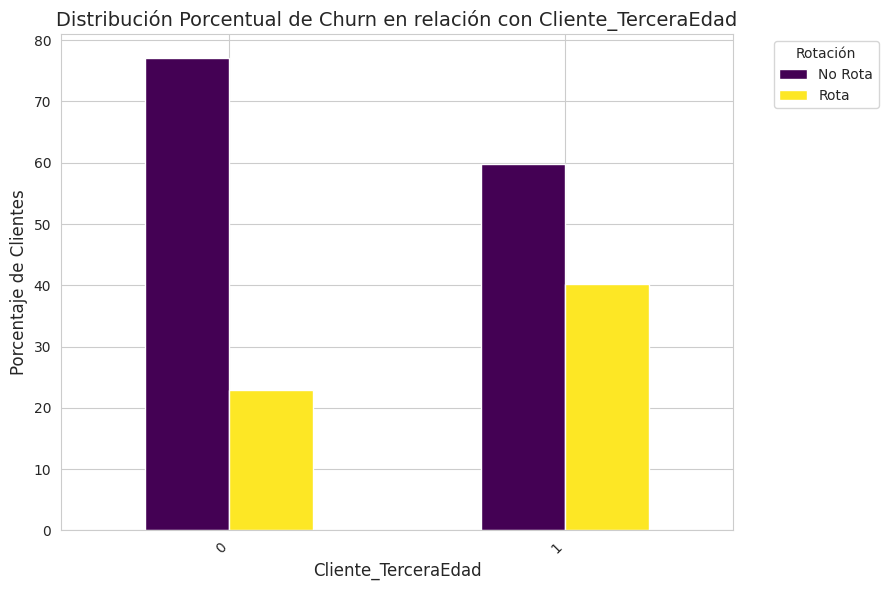


--- Analizando 'Cliente_Pareja' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn             0.0    1.0
Cliente_Pareja              
0               67.99  32.01
1               80.98  19.02


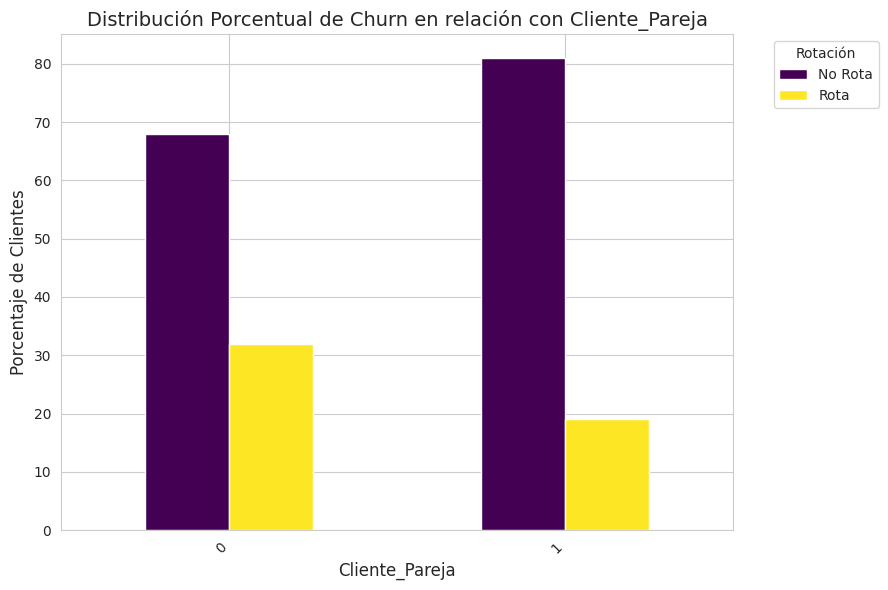


--- Analizando 'Cliente_Dependientes' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                   0.0    1.0
Cliente_Dependientes              
0                     69.66  30.34
1                     85.05  14.95


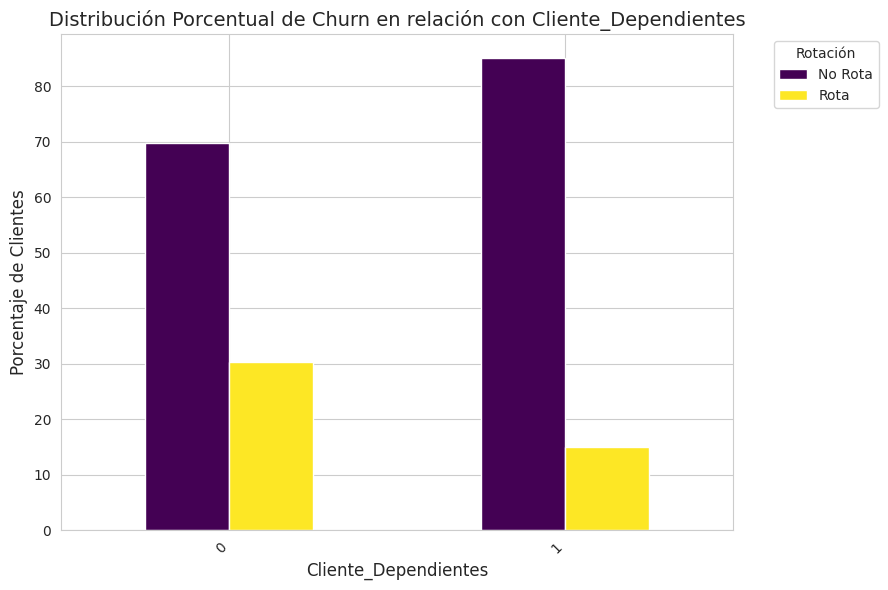


--- Analizando 'Servicio_Telefono' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                0.0    1.0
Servicio_Telefono              
0                  75.95  24.05
1                  74.10  25.90


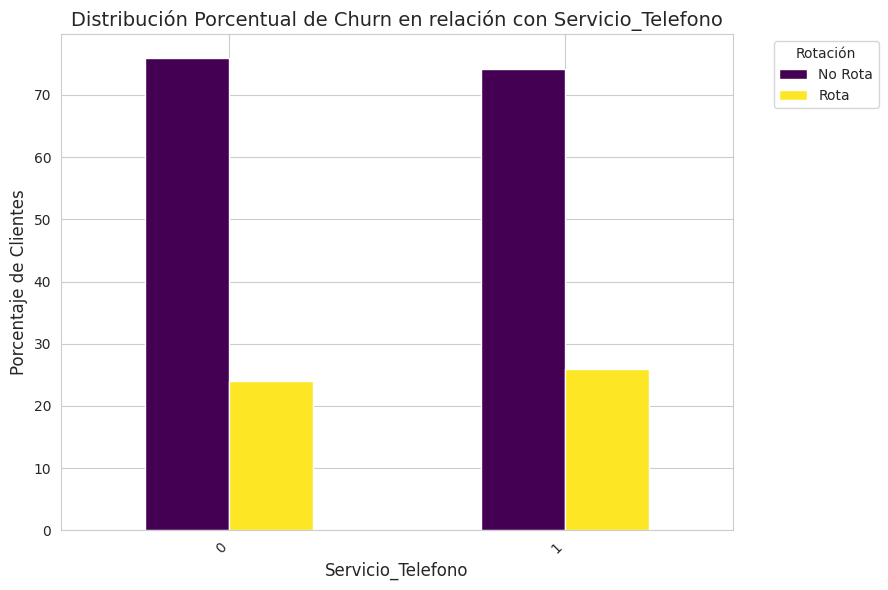


--- Analizando 'Multiples_Lineas' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn               0.0    1.0
Multiples_Lineas              
0                 75.75  24.25
1                 72.27  27.73


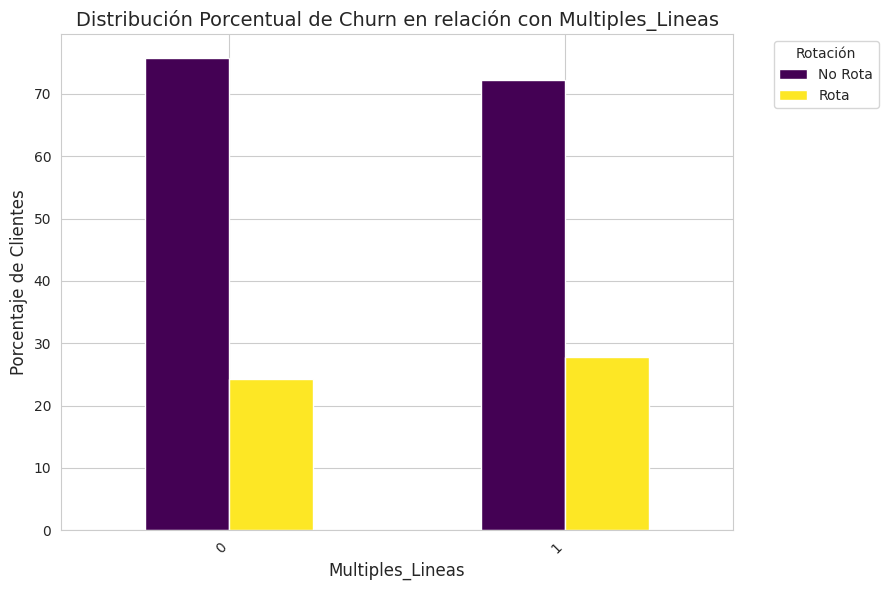


--- Analizando 'Servicio_Internet' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                0.0    1.0
Servicio_Internet              
DSL                81.55  18.45
Fiber optic        59.44  40.56
No                 92.85   7.15


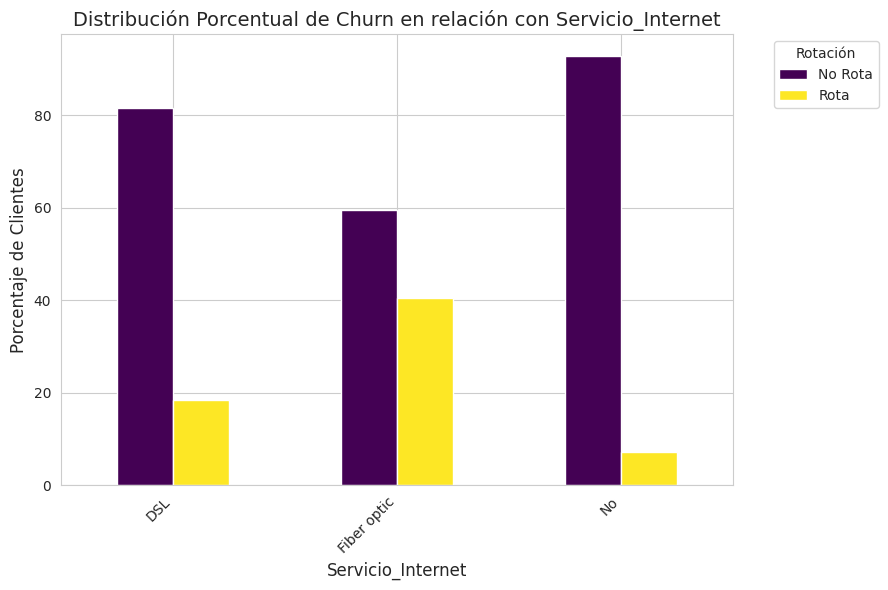


--- Analizando 'Seguridad_Online' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn               0.0    1.0
Seguridad_Online              
0                 69.67  30.33
1                 85.80  14.20


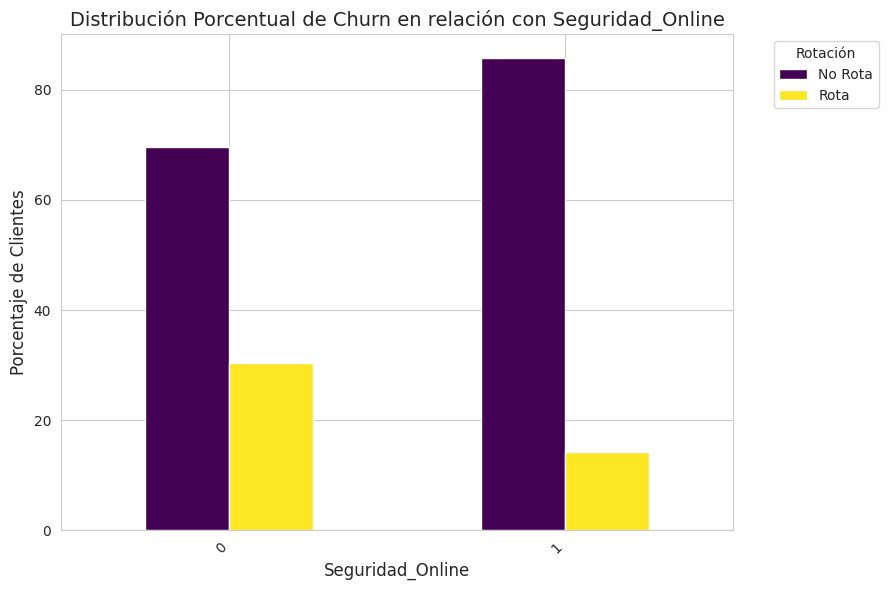


--- Analizando 'Respaldo_Online' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn              0.0    1.0
Respaldo_Online              
0                71.74  28.26
1                79.11  20.89


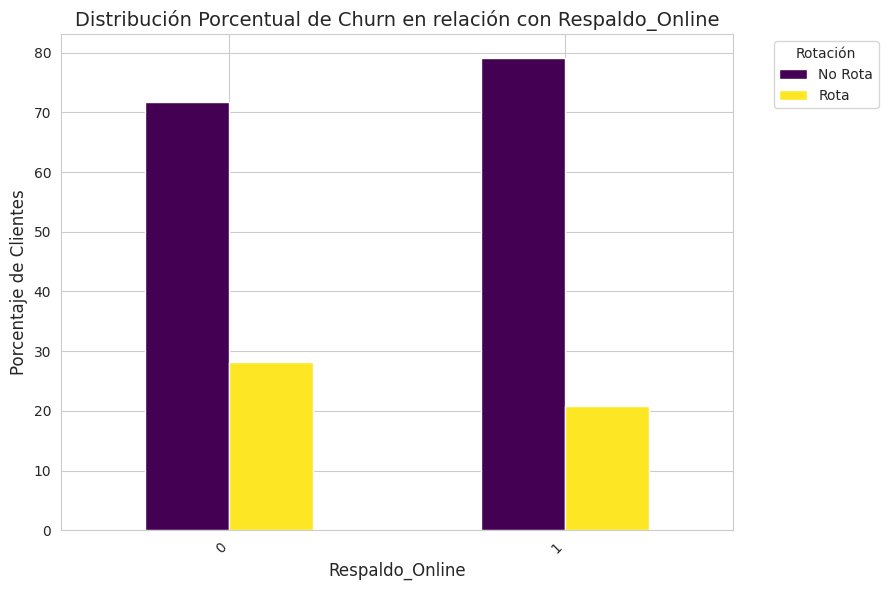


--- Analizando 'Proteccion_Dispositivo' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                     0.0    1.0
Proteccion_Dispositivo              
0                       72.28  27.72
1                       78.12  21.88


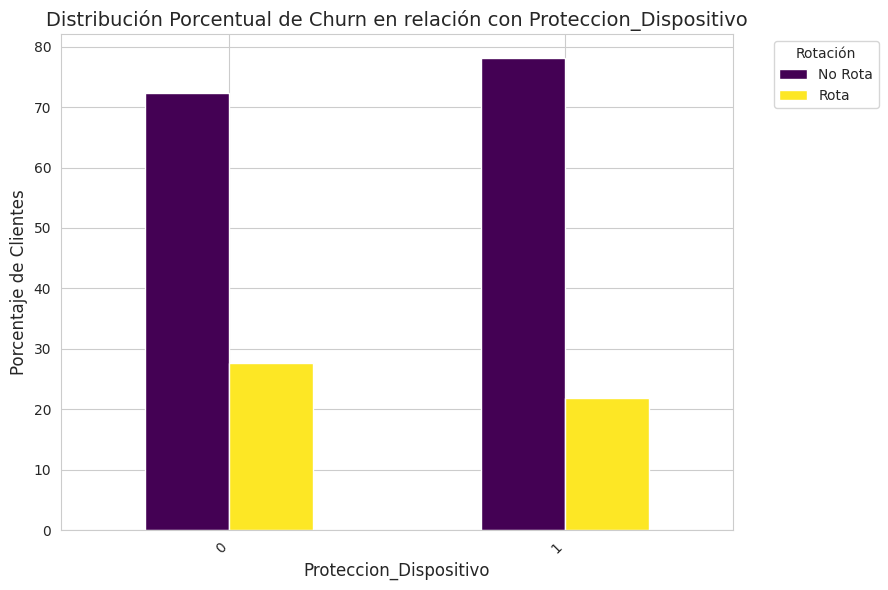


--- Analizando 'Soporte_Tecnico' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn              0.0    1.0
Soporte_Tecnico              
0                69.80  30.20
1                85.27  14.73


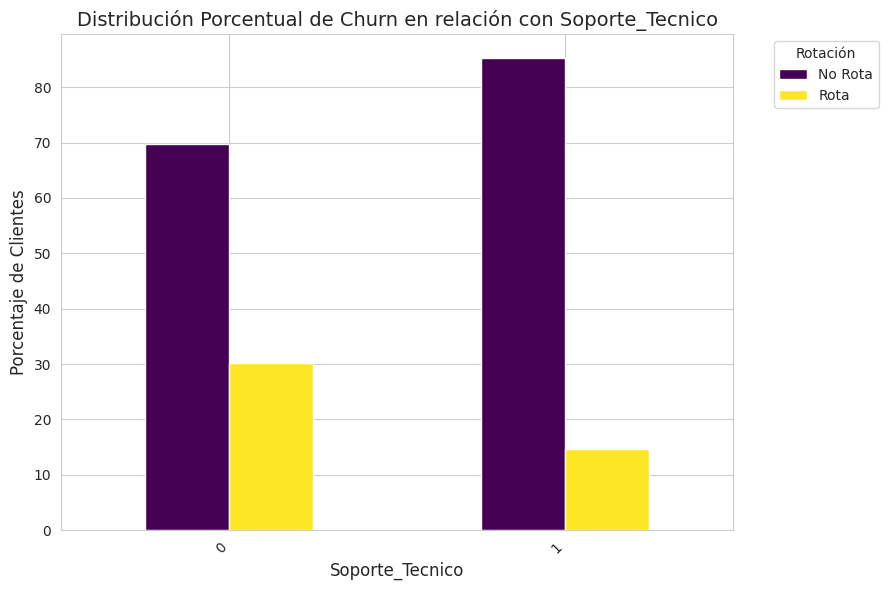


--- Analizando 'Streaming_TV' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn           0.0    1.0
Streaming_TV              
0             76.44  23.56
1             70.82  29.18


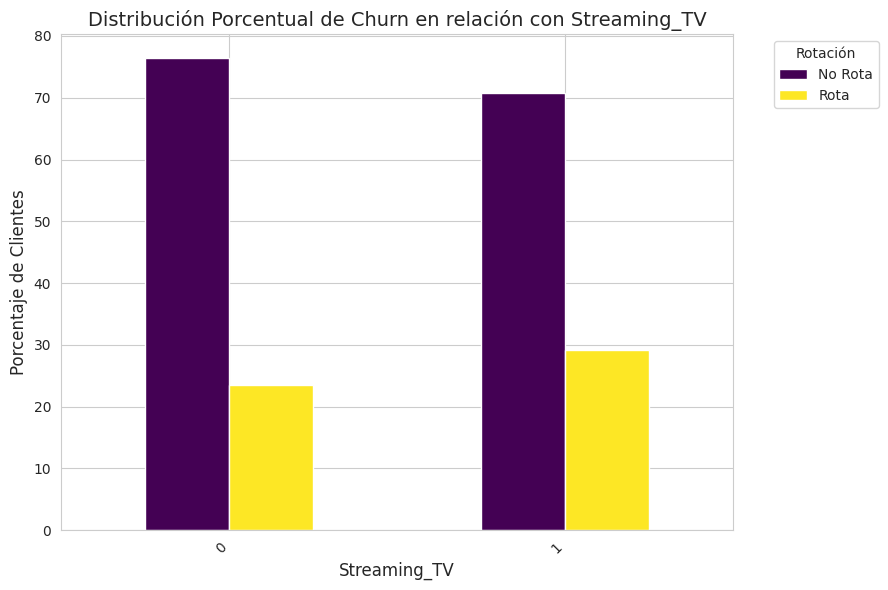


--- Analizando 'Streaming_Peliculas' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                  0.0    1.0
Streaming_Peliculas              
0                    76.39  23.61
1                    70.95  29.05


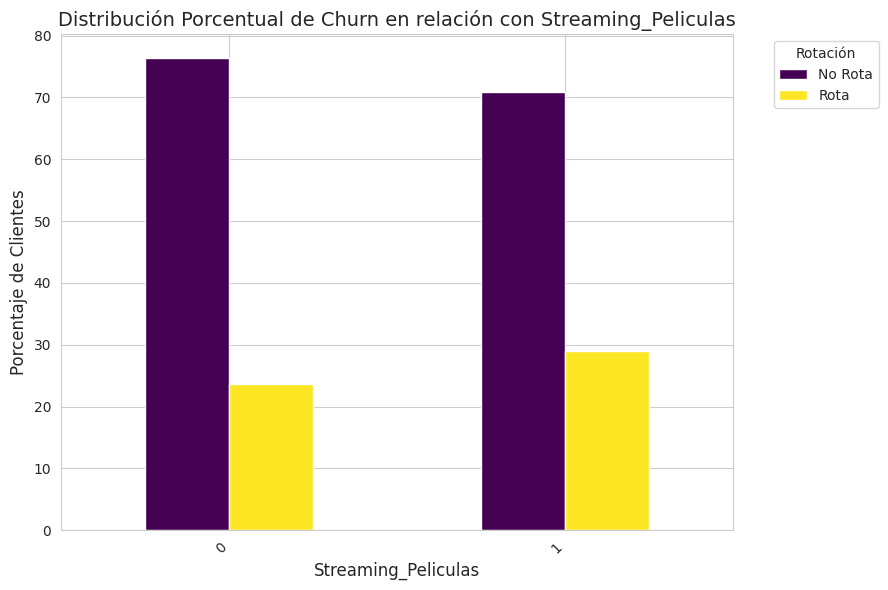


--- Analizando 'Tipo_Contrato' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn             0.0    1.0
Tipo_Contrato               
Month-to-month  58.68  41.32
One year        89.07  10.93
Two year        97.25   2.75


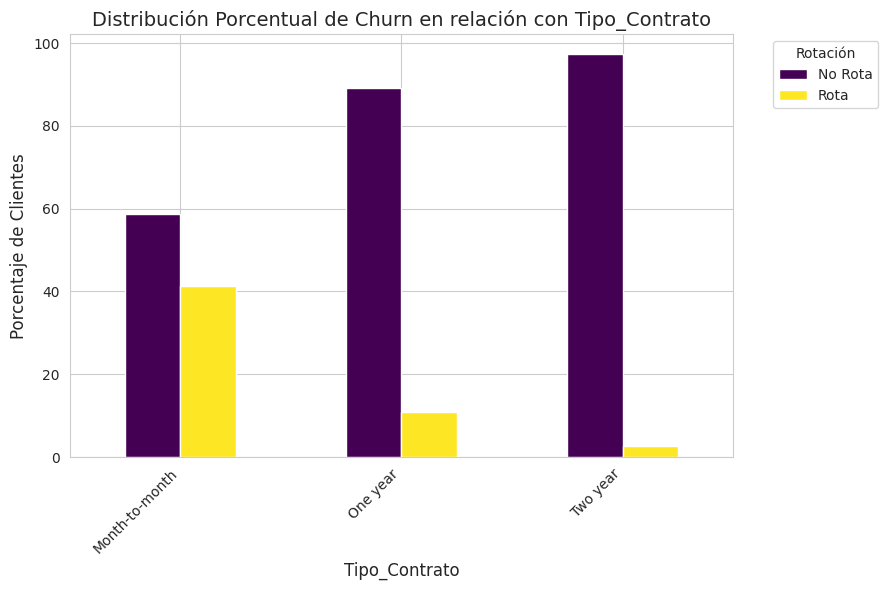


--- Analizando 'Facturacion_Electronica' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                      0.0    1.0
Facturacion_Electronica              
0                        84.13  15.87
1                        67.52  32.48


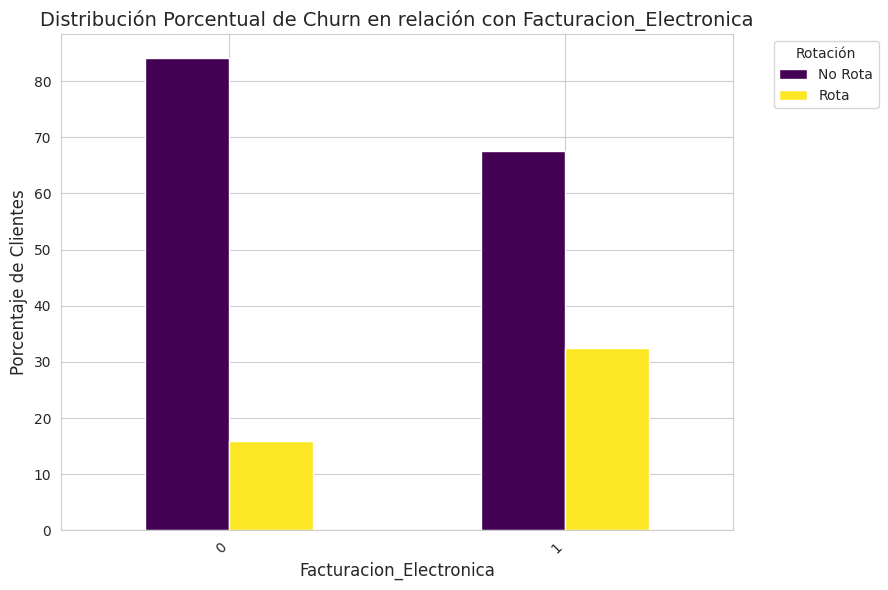


--- Analizando 'Metodo_Pago' en relación con 'Churn' ---
Porcentajes de Churn por categoría:
Churn                        0.0    1.0
Metodo_Pago                            
Bank transfer (automatic)  83.76  16.24
Credit card (automatic)    85.20  14.80
Electronic check           56.20  43.80
Mailed check               81.50  18.50


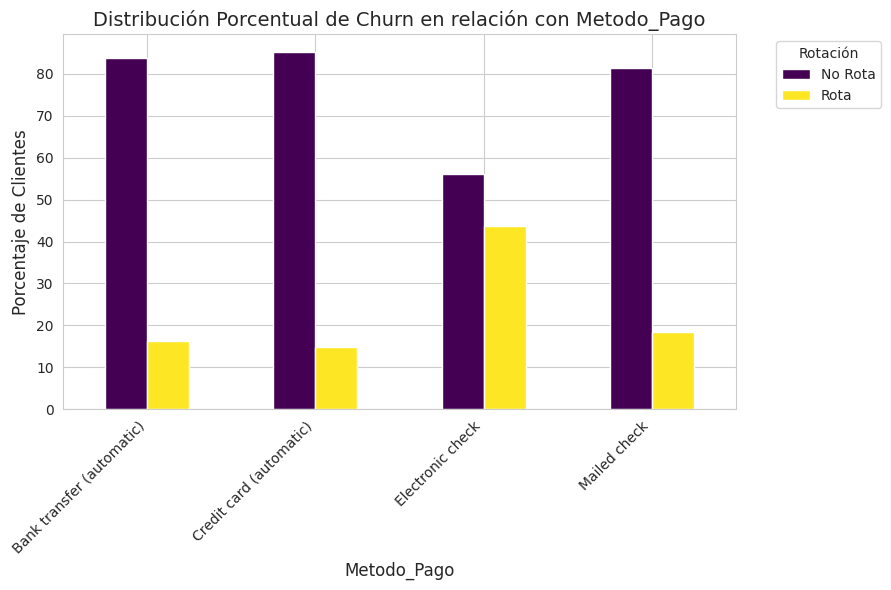

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Paso 8: Explorando la distribución de Churn por variables categóricas...")

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Lista de columnas categóricas que queremos analizar en relación con Churn.
# Excluimos 'ID_Cliente' y 'Churn' de esta lista.
columnas_categoricas_para_analisis = [
    'Genero_Cliente',
    'Cliente_TerceraEdad',
    'Cliente_Pareja',
    'Cliente_Dependientes',
    'Servicio_Telefono',
    'Multiples_Lineas',
    'Servicio_Internet',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'Streaming_TV',
    'Streaming_Peliculas',
    'Tipo_Contrato',
    'Facturacion_Electronica',
    'Metodo_Pago'
]

for col in columnas_categoricas_para_analisis:
    if col in df_clientes.columns:
        print(f"\n--- Analizando '{col}' en relación con 'Churn' ---")

        # Calcular los porcentajes de Churn dentro de cada categoría
        # .unstack() pivota los datos para que Churn=0 y Churn=1 sean columnas
        churn_by_category = df_clientes.groupby(col)['Churn'].value_counts(normalize=True).mul(100).unstack()

        # Asegurarse de que ambas categorías de Churn (0 y 1) estén presentes, rellenando con 0 si no
        if 0 not in churn_by_category.columns:
            churn_by_category[0] = 0
        if 1 not in churn_by_category.columns:
            churn_by_category[1] = 0

        # Ordenar las columnas para asegurar que 'No Rota' y 'Rota' siempre estén en el mismo orden visual
        churn_by_category = churn_by_category[[0, 1]]
        print("Porcentajes de Churn por categoría:")
        print(churn_by_category.round(2))

        # Crear un gráfico de barras apiladas o de lado a lado de los porcentajes
        # 'stacked=False' para barras de lado a lado, 'stacked=True' para apiladas (puedes probar cuál te gusta más)
        churn_by_category.plot(kind='bar', stacked=False, figsize=(9, 6), colormap='viridis')
        plt.title(f'Distribución Porcentual de Churn en relación con {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Porcentaje de Clientes', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.legend(title='Rotación', labels=['No Rota', 'Rota'], bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout() # Ajusta automáticamente los parámetros de la trama para el diseño de la figura
        plt.show()

    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame. Saltando su análisis.")


Paso 9: Explorando la distribución de Churn por variables numéricas...

--- Analizando 'Antiguedad_Meses' en relación con 'Churn' ---


/tmp/ipython-input-617995999.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='magma')


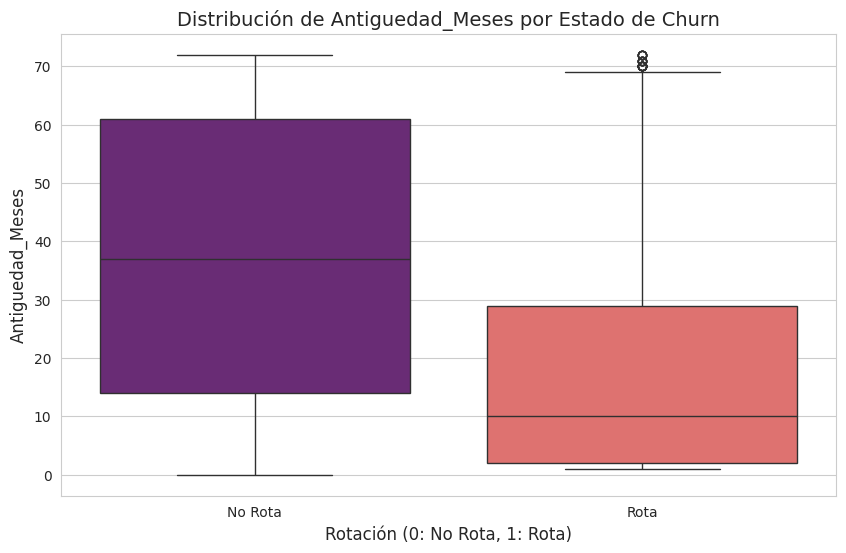

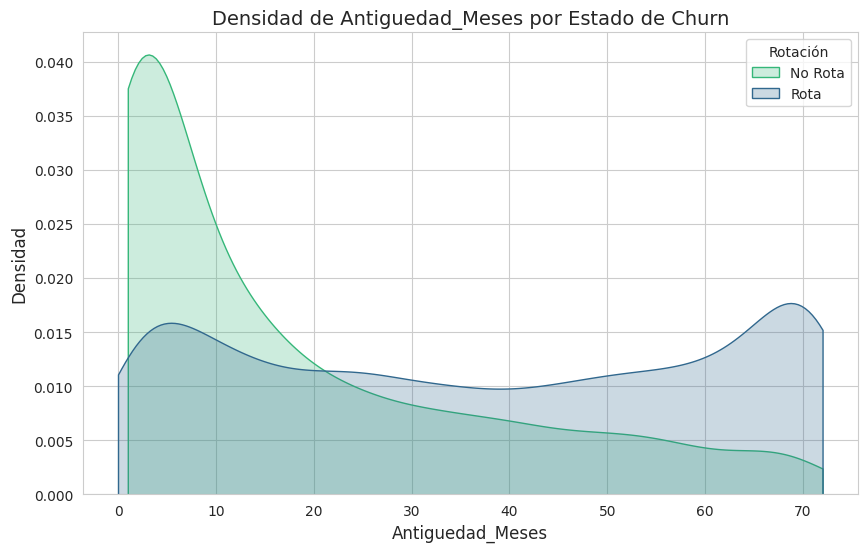


--- Analizando 'Cargos_Mensuales' en relación con 'Churn' ---


/tmp/ipython-input-617995999.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='magma')


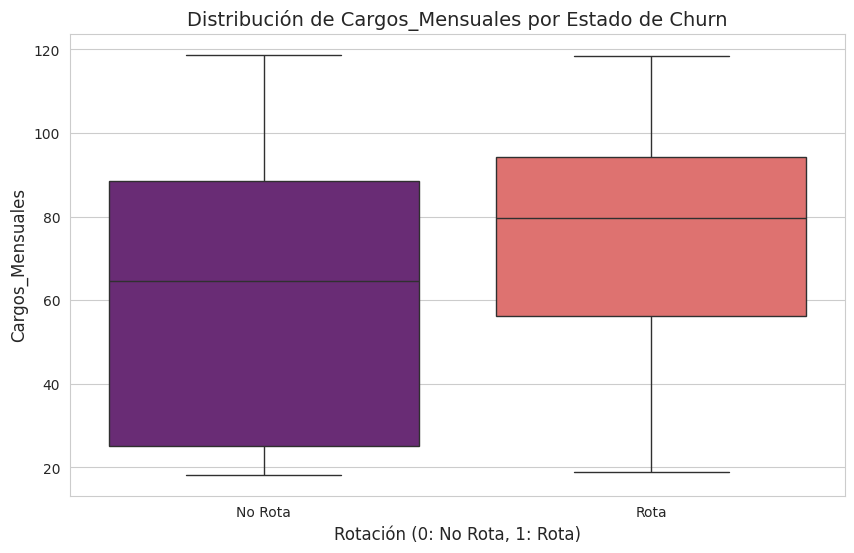

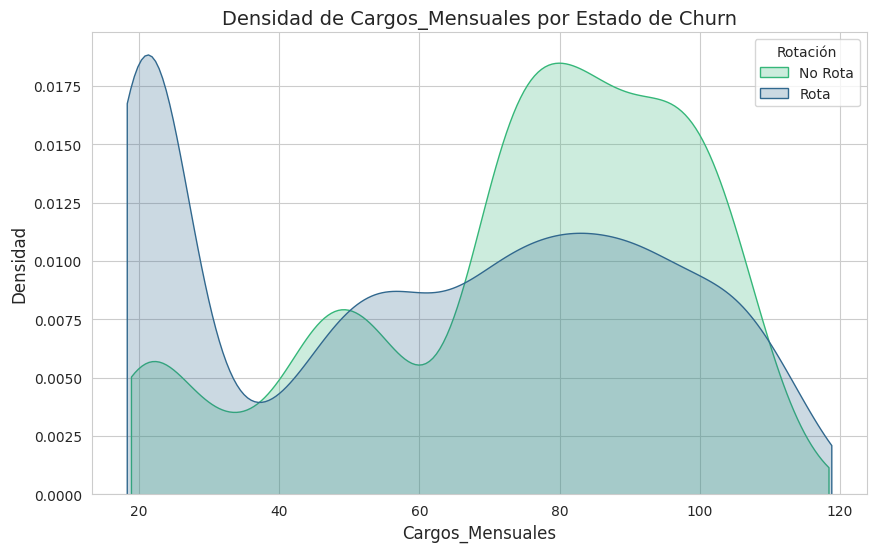


--- Analizando 'Cargos_Totales' en relación con 'Churn' ---


/tmp/ipython-input-617995999.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='magma')


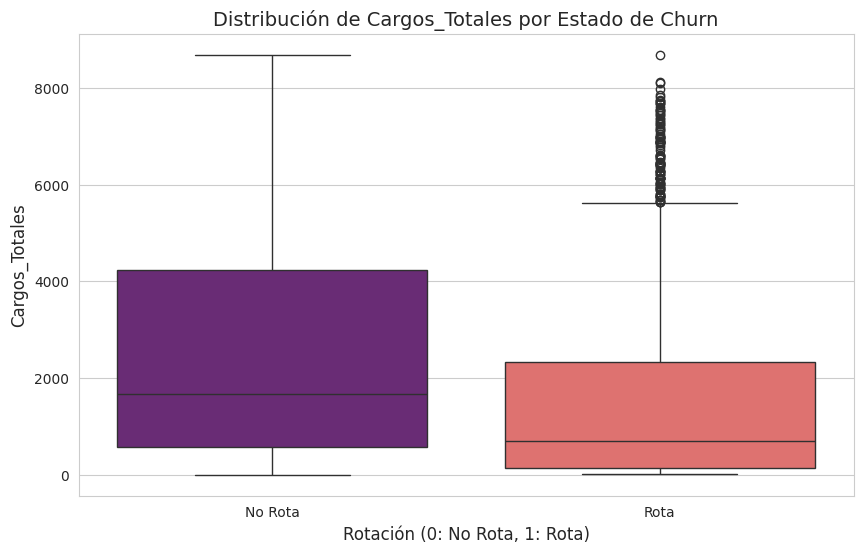

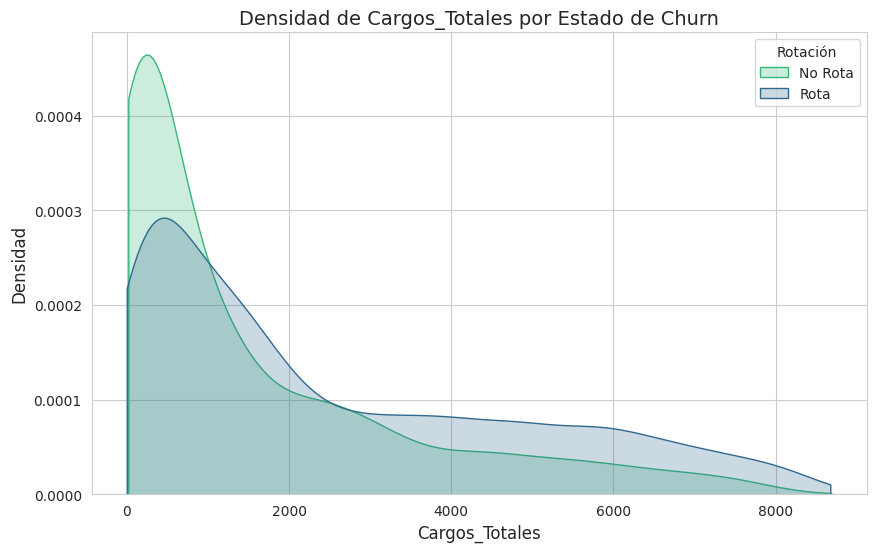


--- Analizando 'Cuentas_Diarias' en relación con 'Churn' ---


/tmp/ipython-input-617995999.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='magma')


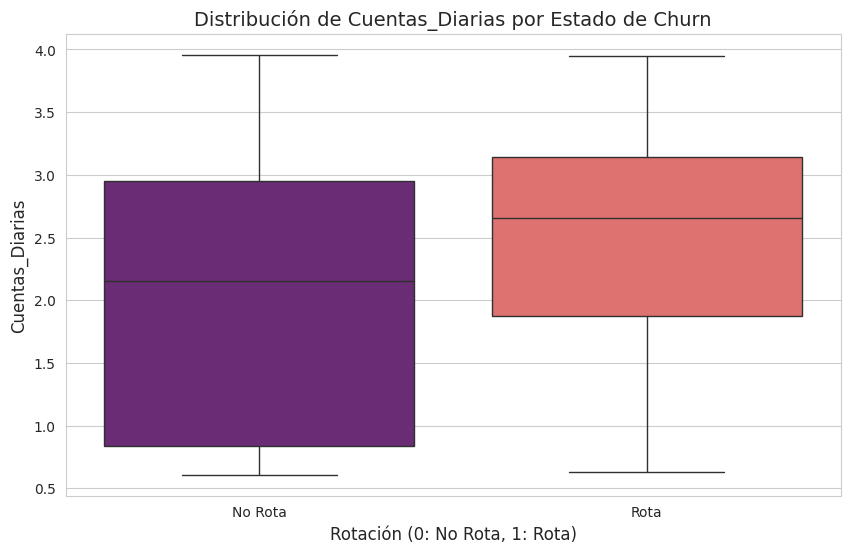

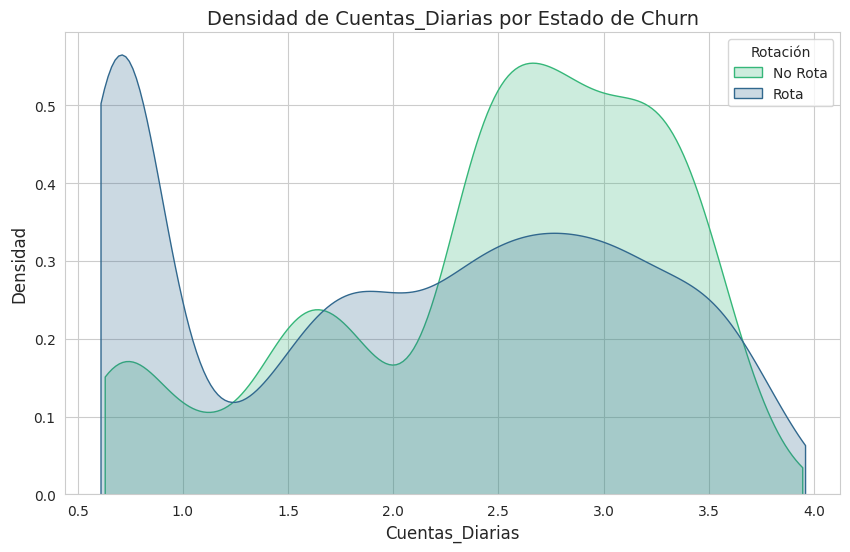


Análisis de Churn por variables numéricas completado para el Paso 9.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Paso 9: Explorando la distribución de Churn por variables numéricas...")

# Estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Lista de columnas numéricas que queremos analizar en relación con Churn.
columnas_numericas_para_analisis = [
    'Antiguedad_Meses',
    'Cargos_Mensuales',
    'Cargos_Totales',
    'Cuentas_Diarias' # La columna que creamos en un paso anterior
]

# Realizamos las visualizaciones
for col in columnas_numericas_para_analisis:
    if col in df_clientes.columns:
        print(f"\n--- Analizando '{col}' en relación con 'Churn' ---")

        # Gráfico de Boxplot: Compara la mediana, cuartiles y posibles valores atípicos
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Churn', y=col, data=df_clientes, palette='magma')
        plt.title(f'Distribución de {col} por Estado de Churn', fontsize=14)
        plt.xlabel('Rotación (0: No Rota, 1: Rota)', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(ticks=[0, 1], labels=['No Rota', 'Rota'], fontsize=10)
        plt.show()

        # Gráfico de Densidad (KDE Plot): Muestra la forma de la distribución
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df_clientes, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis', cut=0)
        plt.title(f'Densidad de {col} por Estado de Churn', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Densidad', fontsize=12)
        plt.legend(title='Rotación', labels=['No Rota', 'Rota'])
        plt.show()

    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame. Saltando su análisis.")

print("\nAnálisis de Churn por variables numéricas completado para el Paso 9.")